https://github.com/invibe/ANEMO/issues/3

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/modules/svm.html#svm-classification

https://scikit-learn.org/stable/modules/svm.html
https://scikit-learn.org/stable/modules/model_evaluation.html
https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py
https://scikit-learn.org/stable/modules/compose.html
https://scikit-learn.org/stable/auto_examples/index.html#calibration
https://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import svm, datasets
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py

0.575


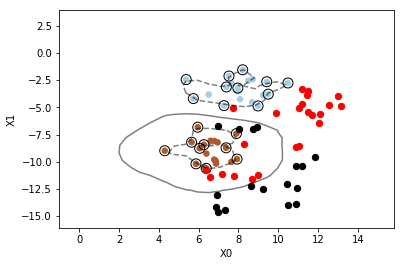

In [2]:
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
a = 5
xx = np.linspace(xlim[0]-a, xlim[1]+a, 30)
yy = np.linspace(ylim[0]-a, ylim[1]+a, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

#############################
'''xx1, yy1 = make_meshgrid(X[:, 0], X[:, 1])
Z1 = clf.predict(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)'''

#ax.contourf(xx1, yy1, Z1, cmap=plt.cm.bone, alpha=0.5)
'''ax.imshow(Z1, interpolation='nearest',
           extent=(xx1.min(), xx1.max(), yy1.min(), yy1.max()), aspect='auto',
           origin='lower', cmap=plt.cm.bone)'''
##################################""

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

X1 = np.zeros_like(X)
for a in range(40) :
    X1[a, 0] = X[a, 0]+np.random.rand()*5
    X1[a, 1] = X[a, 1]-np.random.rand()*5



print(clf.score(X1, y))
#print(y, clf.predict(X1), y==clf.predict(X1))

#plt.scatter(X1[:, 0], X1[:, 1], c=clf.predict(X1), s=40, cmap=plt.cm.Paired)

for a in range(40) :
    if y[a]!=clf.predict(X1)[a] :
        plt.scatter(X1[a, 0], X1[a, 1], c='k', s=40)
    else :
        plt.scatter(X1[a, 0], X1[a, 1], c='r', s=40)

ax.set_xlabel('X0')
ax.set_ylabel('X1')

plt.show()

In [3]:
#------------------------------------------------------------------------------
# 1- Split into a training set and a test set using a ShuffleSplit
#    + doing that in parallel for the differrent features to test
#------------------------------------------------------------------------------

from sklearn.model_selection import ShuffleSplit
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

rs = ShuffleSplit(n_splits=1, test_size=.5, train_size=None, random_state=0)
for index_train, index_test in rs.split(y): pass

X_train, X_test = {}, {}
X_train, X_test = X[index_train, :], X[index_test, :]
y_train, y_test =  y[index_train].copy(), y[index_test].copy()
n_train, n_test = y_train.shape[0], y_test.shape[0]

'''print('X_train', len(X_train[0]))
print('X_test', X_test)
print('y_train', y_train)
print('y_test', y_test)
print(n_train, n_test)'''

"print('X_train', len(X_train[0]))\nprint('X_test', X_test)\nprint('y_train', y_train)\nprint('y_test', y_test)\nprint(n_train, n_test)"

In [4]:
#------------------------------------------------------------------------------
# 2- normalization TODO: check in mode edge if that normalization is fine
#------------------------------------------------------------------------------
    
# sanity check with a dummy classifier:
from sklearn.dummy import DummyClassifier
from sklearn import metrics
dc = DummyClassifier(strategy='most_frequent', random_state=0)
X_train_, X_test_ = np.zeros((n_train, 0)), np.zeros((n_test, 0))

X_test_ = np.hstack((X_test_, X_test))
X_train_ = np.hstack((X_train_, X_train))
if y_train.size > 0:
    dc = dc.fit(X_train_, y_train)
    print("Contrôle avec un classificateur factice:")
    print("score = %f "%dc.score(X_test_, y_test))#, scoring=metrics.f1_score))

Contrôle avec un classificateur factice:
score = 0.280000 


In [5]:
from sklearn.grid_search import GridSearchCV
# see http://scikit-learn.org/stable/modules/grid_search.html
from sklearn.svm import SVC

#------------------------------------------------------------------------------
# 4- Train a SVM classification model
#------------------------------------------------------------------------------

# When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma.

#The parameter C, common to all SVM kernels, trades off misclassification
#of training examples against simplicity of the decision surface.
#    A low C makes the decision surface smooth,
#    while a high C aims at classifying all training examples correctly.

#gamma defines how much influence a single training example has.
#    The larger gamma is, the closer other examples must be to be affected.



C_range = np.logspace(-5, 10., 10, base=2.)
gamma_range = np.logspace(-14, 3, 10, base=2.)

param_grid = {'C': C_range, 'gamma': gamma_range }

grid = GridSearchCV(SVC(verbose=False,
                        kernel='rbf',
                        tol=1e-3,
                        max_iter = -1,
                        ),
                    param_grid,
                    verbose=1,
                    scoring='f1_weighted')

X_train_ = np.zeros((n_train, 0))
X_train_ = np.hstack((X_train_, X_train))
grid.fit(X_train, y_train.ravel())

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
score_dict = grid.grid_scores_

scores_mean, scores_std =[],  []
for params, mean_score, scores in score_dict:
    scores_mean.append(scores.mean())
    scores_std.append(scores.std()/2)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
The best parameters are {'C': 10.079368399158989, 'gamma': 0.0031003926796253885} with a score of 0.99


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished


In [6]:
#------------------------------------------------------------------------------
# 5- Quantitative evaluation of the model quality on the test set
#------------------------------------------------------------------------------

print("Predicting the category names on the testing set")

y_pred = grid.predict(X_test)
# predicted_target.append(y_pred)



from sklearn.metrics import classification_report
print('classification_report on test \n', classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print('confusion_matrix on test \n', confusion_matrix(y_test, y_pred))
print('fone_score on test', metrics.f1_score(y_test, y_pred, average=None))

# see https://en.wikipedia.org/wiki/F1_score
fone_score = np.array(metrics.f1_score(y_test, y_pred, average=None)).mean()
print("=> Accuracy = %0.2f" % (fone_score))

Predicting the category names on the testing set
classification_report on test 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       0.90      0.93      0.92        30
          2       0.91      0.88      0.89        24

avg / total       0.93      0.93      0.93        75

confusion_matrix on test 
 [[21  0  0]
 [ 0 28  2]
 [ 0  3 21]]
fone_score on test [1.         0.91803279 0.89361702]
=> Accuracy = 0.94


0
[1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 0 1]
score 0.25925925925925924
score2 1.0
1
[1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 0 1]
score 0.018518518518518517
score2 1.0
2
[1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 0 1]
score 0.037037037037037035
score2 1.0


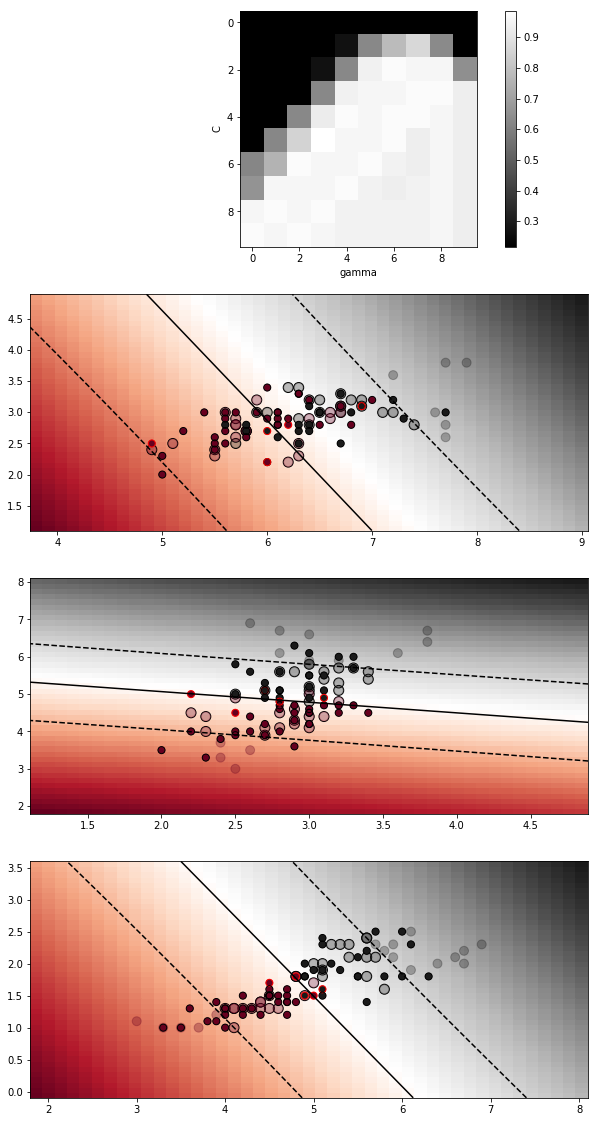

In [10]:
'''grid.decision_function()
clf.decision_function()'''

# draw heatmap of accuracy as a function of gamma and C
fig, ax = plt.subplots(4,1,figsize=(10,20))

scores = np.array(scores_mean).reshape((gamma_range.shape[0], C_range.shape[0]))
im = ax[0].imshow(scores, interpolation='nearest', cmap=plt.cm.gray)
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('C')
#ax[0]. set_colorbar()
cbar = fig.colorbar(im, ax=ax[0])

for x_ in range(len(X_train[0])-1) :

    print(x_)
    X_2d = X_train[:, x_:x_+2]
    
    X_2d = X_2d[y_train > 0]
    y_2d = y_train[y_train > 0]
    y_2d -= 1
    print(y_2d)
    ax[x_+1].scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, s=80, cmap=plt.cm.RdGy)
    #ax[x_+1] = plt.gca()
    xlim = ax[x_+1].get_xlim()
    ylim = ax[x_+1].get_ylim()
    
    # create grid to evaluate model
    a = 1
    xx = np.linspace(xlim[0]-a, xlim[1]+a, len(X_2d[:, 0]))
    yy = np.linspace(ylim[0]-a, ylim[1]+a, len(X_2d[:, 1]))
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    clf = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
    clf.fit(X_2d, y_2d)
    Z = clf.decision_function(xy).reshape(XX.shape)

    
    # plot decision boundary and margins
    ax[x_+1].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1,
               linestyles=['--', '-', '--'])
    ax[x_+1].pcolormesh(XX, YY, Z, cmap=plt.cm.RdGy)
    
    # plot support vectors
    ax[x_+1].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    ax[x_+1].scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, s=80, cmap=plt.cm.RdGy, alpha=0.3)
    
    X_test_2d = X_test[:, x_:x_+2]
    
    
    y_pred2 = clf.predict(X_test_2d)
    
    print('score', clf.score(X_test_2d[y_pred > 0], y_pred[y_pred > 0]))
    print('score2', clf.score(X_test_2d, y_pred2))
    
    
    
    
    ax[x_+1].scatter(X_test_2d[:, 0][y_pred > 0], X_test_2d[:, 1][y_pred > 0], c=y_pred[y_pred > 0],
                     s=40, cmap=plt.cm.RdGy)
    
    for a in range(len(X_test_2d)) :
        if y_pred[a] > 0 :
            if y_test[a]!=y_pred[a] :
                ax[x_+1].scatter(X_test_2d[a, 0], X_test_2d[a, 1], facecolors='none', s=50, lw=1, edgecolors='r')
            else :
                ax[x_+1].scatter(X_test_2d[a, 0], X_test_2d[a,1], facecolors='none', s=50, lw=1, edgecolors='k')



plt.show()


The best parameters are {'gamma': 0.1, 'C': 1.0} with a score of 0.97


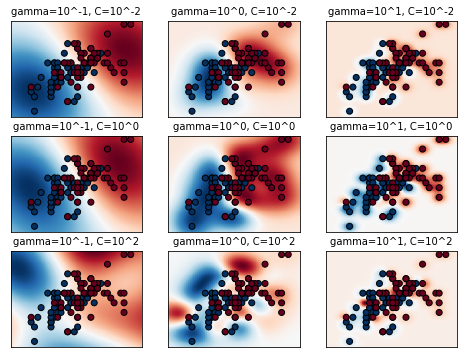

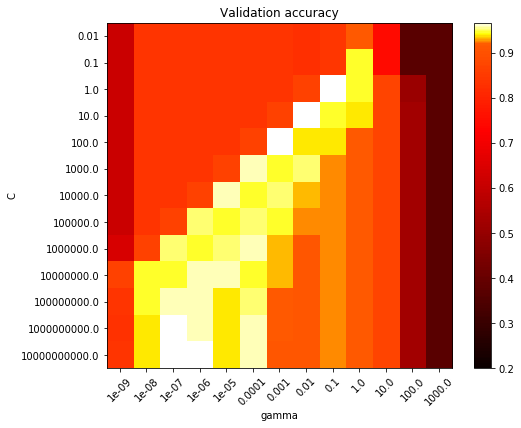

In [151]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
        

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1


# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))

plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()


The best parameters are {'gamma': 0.1, 'C': 1.0} with a score of 0.97


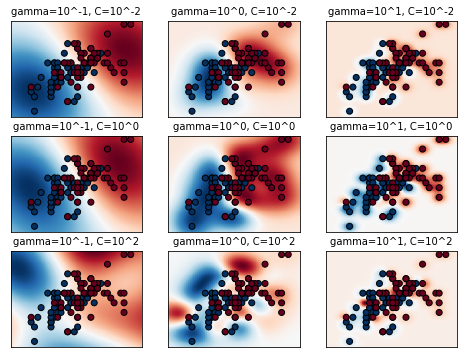

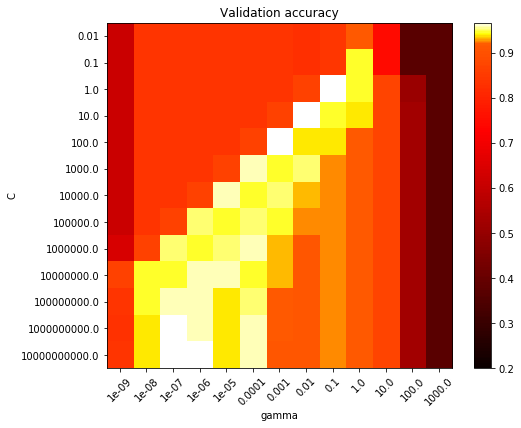

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()


In [ ]:
def svm(self, exp, opt_notSVM='', opt_SVM='', databases=['serre07_distractors', 'serre07_targets'],
        edgeslists=[None, None], N_edges=None, database_labels=None, group_labels=None,
        feature='full', kernel='precomputed', KL_type='JSD', noise=0.):
    
    import time
    time.sleep(.1*np.random.rand())
    # DEFINING FILENAMES
    # put here thing that do change the histogram
    # opt_notSVM = opt_notSVM # (this should be normally passed to exp, as in 'classifier_noise')
    # and here things that do not change the (individual) histograms but
    # rather the SVM classification:
    if (self.pe.svm_log): opt_SVM += '_log'
    if self.pe.svm_norm: opt_SVM += '_norm'
    name_databases = ''
    for database in databases: name_databases += database + '_'
    txtname = os.path.join(self.pe.figpath, exp + '_SVM_' + name_databases + feature + opt_notSVM + opt_SVM +'.txt')
    matname_score = txtname.replace(self.pe.figpath, self.pe.matpath).replace('.txt', '.npy')


    # DEFINING FEATURES TO USE
    if feature == 'first_chevron':
        features = ['first', 'chevron']
    elif feature == 'first_full':
        features = ['first', 'full']
    else:
        features = [feature]
    ###############################################################################
    # Process all images to extract edges and plot relevant histograms
    n_databases = len(databases)
    mode = 'full' if n_databases>1 else 'edge'
    
    for i_database, (name_database, edgeslist) in enumerate(zip(databases, edgeslists)):
        if edgeslist is None:
            imagelist, edgeslist, MSE = self.process(exp, note=opt_notSVM, name_database=name_database, noise=noise)
        else:
            imagelist = 'ok'

    if os.path.isfile(matname_score):
        fone_score = np.load(matname_score)
        self.log.warn("=> Accuracy = %0.2f +/- %0.2f in %s ", fone_score.mean(), fone_score.std(), txtname)
        return fone_score

    if os.path.isfile(matname_score + '_lock'):
        self.log.info(' >> Locked SVM : %s ', matname_score + '_lock')
        return None
    else:
        open(matname_score + '_lock', 'w').close()
        for feature_ in features:
            ###############################################################################
            # Download the data, if not already on disk and saves it as numpy arrays
            n_databases = len(databases)

            for i_database, (name_database, edgeslist) in enumerate(zip(databases, edgeslists)):
                matname_hist = os.path.join(self.pe.matpath, exp + '_SVM-hist_' + name_database + '_' + feature_ + opt_notSVM + '.npy')

                if not(os.path.isfile(matname_hist)):
                    self.log.info(' >> There is no histogram, computing %s ', matname_hist)
                    if os.path.isfile(matname_hist + '_lock'):
                        self.log.info(' XX The process computing the histogram in %s is locked by %s_lock', name_database, matname_hist)
                    else:
                        open(matname_hist + '_lock', 'w').close()
                        if edgeslist is None:
                            imagelist, edgeslist, MSE = self.process(exp, note=opt_notSVM, name_database=name_database, noise=noise)
                        else:
                            imagelist = 'ok'
                        try:
                            t0 = time.time()
                            hists = []
                            # TODO : compute histograms with less edges?
                            N_edges_hist = edgeslist.shape[1]

                            for i_image in range(edgeslist.shape[2]):
                                if feature_ == 'full':
                                    # using the full histogram
                                    v_hist = self.cooccurence_hist(edgeslist[:, :N_edges_hist, i_image], mode=mode)
                                elif feature_ == 'full_nochevron':
                                    #  or just the chevron map
                                    v_hist = self.cooccurence_hist(edgeslist[:, :N_edges_hist, i_image], mode=mode)
                                    # marginalize over theta and psi
                                    v_hist = v_hist.sum(axis=(1, 2))
                                elif feature_ == 'chevron':
                                    #  or just the chevron map
                                    v_hist = self.cooccurence_hist(edgeslist[:, :N_edges_hist, i_image], mode=mode)
                                    # marginalize over distances and scales
                                    v_hist = v_hist.sum(axis=(0, 3))
                                elif feature_ == 'first':
                                    # control with first-order
                                    v_hist, v_theta_edges_ = self.histedges_theta(edgeslist[:, :N_edges_hist, i_image], display=False, mode=mode)
                                elif feature_ == 'first_rot':
                                    edgeslist[2, :, i_image] += np.random.rand() * np.pi
                                    # control with first-order
                                    v_hist, v_theta_edges_ = self.histedges_theta(edgeslist[:, :N_edges_hist, i_image], display=False, mode=mode)
                                else:
                                    self.log.error('problem here, you asked for a non-existant feature', feature_)
                                    break

                                # normalize histogram
                                if mode=='full':
                                    v_hist /= v_hist.sum()
                                else:
                                    # take only the first edges
                                    # but still, the histogram is computed on all edges
                                    if N_edges is None: N_edges = edgeslist.shape[1]
                                    v_hist = v_hist[..., :N_edges]
                                    for i_edge in range(v_hist.shape[-1]):
                                        if v_hist[..., i_edge].sum() ==0 : print('dooh! v_hist is null')
                                        v_hist[..., i_edge] /= v_hist[..., i_edge].sum()

                                # append for each image
                                hists.append(v_hist)

                            hists = np.array(hists)
                            np.save(matname_hist, hists)
                            self.log.info("Histogram done in %0.3fs", (time.time() - t0))
                        except Exception as e:
                            self.log.error(' XX The process computing edges in %s is locked ', name_database)
                            self.log.error(' Raised Exception %s  ', e)
                        try:
                            os.remove(matname_hist + '_lock')
                        except Exception:
                            self.log.error(' xxx when trying to remove it, I found no lock file named %s_lock', matname_hist)


        # gather data
        locked = False
        X_, y_ = {}, []
        for feature_ in features:
            X_[feature_] = []
            for i_database, name_database in enumerate(databases):
                matname_hist = os.path.join(self.pe.matpath, exp + '_SVM-hist_' + name_database + '_' + feature_ + opt_notSVM + '.npy')
                try:
                    hists = np.load(matname_hist)
                    for i_image in range(hists.shape[0]):
                        if mode=='full':
                            X_[feature_].append(hists[i_image, ...].ravel())
                        else:
                            X__ = []
                            for i_edge in range(hists.shape[-1]):
                                X__.append(hists[i_image, ..., i_edge].ravel())
                            X_[feature_].append(X__)
                            
                except Exception as e:
                    self.log.warn(' >> Missing histogram, skipping SVM : %s ', e)
                    locked = True
                    return None

        # appending all data for all images
        for i_database, (name_database, edgeslist) in enumerate(zip(databases, edgeslists)):
            imagelist, edgeslist, MSE = self.process(exp, note=opt_notSVM, name_database=name_database, noise=noise)
            try:
                if mode=='full':
                    for i_image, (filename, croparea) in enumerate(imagelist):
                        y_.append(i_database)
                else:
                    if N_edges is None:
                        N_edges = edgeslist.shape[1]
                    # print('N_edges', N_edges)  #DEBUG
                    for i_image, (filename, croparea) in enumerate(imagelist):
                        labels, y__ = self.get_labels(edgeslist[:, :N_edges, i_image], filename, croparea, database_labels=database_labels)
                        if not group_labels is None:
                            y__ = [group_labels[label] for label in y__]
                        y_.append(y__)
            except Exception as e:
                self.log.warn(' >> Failed the labelling, skipping SVM : %s ', e)
                locked = True
                return None

        # converting to numpy
        X = {}
        for feature_ in features:
            X[feature_] = np.array(X_[feature_])
        y = np.array(y_)


        # do the classification
        fone_score = np.zeros(self.pe.N_svm_cv)
        t0_cv = time.time()
        for i_cv in range(self.pe.N_svm_cv):
            
            ###############################################################################
            # 1- Split into a training set and a test set using a ShuffleSplit
            #    + doing that in parallel for the differrent features to test
            ###############################################################################
            
            from sklearn.model_selection import ShuffleSplit
            rs = ShuffleSplit(n_splits=1, test_size=self.pe.svm_test_size, random_state=self.pe.seed + i_cv)
            # split into a training and testing set
            for index_train, index_test in rs.split(y): pass
            X_train, X_test = {}, {}
            if mode=='full':
                for feature_ in features:
                    X_train[feature_], X_test[feature_] = X[feature_][index_train, :], X[feature_][index_test, :]
                y_train, y_test =  y[index_train].copy(), y[index_test].copy()
            else:
                for feature_ in features:
                    X_train[feature_], X_test[feature_] = X[feature_][index_train, :, :].copy(), X[feature_][index_test, :, :].copy()
                y_train, y_test =  y[index_train, :].copy(), y[index_test, :].copy()
            n_train, n_test = y_train.shape[0], y_test.shape[0]
            # is_target.append(y_test)
            # tested_indices.append(index_test)

            ###############################################################################
            # 2- normalization TODO: check in mode edge if that normalization is fine
            ###############################################################################
            if self.pe.svm_log and (kernel == 'rbf'):
                # trying out if some log-likelihood like representation is better for classification
                #(makes sense when thinking that animals would have some profile modulating all probabilities)
                eps = 1.e-16
                for feature_ in features:
                    m_hist_1 = X_train[feature_][y_train==1, ...].mean(axis=0) # average histogram for distractors x on the training set
                    for i_image in range(X_train[feature_].shape[0]):
                        X_train[feature_][i_image, ...] = np.log(X_train[feature_][i_image, ...] + eps)-np.log(m_hist_1 + eps)
                    for i_image in range(X_test[feature_].shape[0]):
                        X_test[feature_][i_image, ...] = np.log(X_test[feature_][i_image, ...] + eps)-np.log(m_hist_1 + eps)
            if self.pe.svm_norm:
                if (kernel == 'rbf'):
                    from sklearn.preprocessing import StandardScaler
                    scaler = StandardScaler()
                    for feature_ in features:
                        X_train[feature_] = scaler.fit_transform(X_train[feature_])
                        scaler.fit(X[feature_])
                        X_test[feature_] = scaler.transform(X_test[feature_])
                else: # applying a "prior" (the probability represents the probability /knowing/ it belongs to the reference set containging all categories)
                    eps = 1.e-16
                    for feature_ in features:
                        m_hist_1 = X_train[feature_][y_train==1, ...].mean(axis=0) # average histogram for distractors x on the training set
                        for i_image in range(n_train):
                            X_train[feature_][i_image, ...] = X_train[feature_][i_image, ...]/(m_hist_1 + eps)
                            X_train[feature_][i_image, ...] /= X_train[feature_][i_image, ...].sum()
                        for i_image in range(n_test):
                            X_test[feature_][i_image, ...] = X_test[feature_][i_image, ...]/(m_hist_1 + eps)
                            X_test[feature_][i_image, ...] /= X_test[feature_][i_image, ...].sum()

            try:
                # sanity check with a dummy classifier:
                from sklearn.dummy import DummyClassifier
                from sklearn import metrics
                dc = DummyClassifier(strategy='most_frequent', random_state=self.pe.seed+i_cv)
                X_train_, X_test_ = np.zeros((n_train, 0)), np.zeros((n_test, 0))
                for feature_ in features:
                    X_test_ = np.hstack((X_test_, X_test[feature_]))
                    X_train_ = np.hstack((X_train_, X_train[feature_]))
                if y_train.size > 0:
                    dc = dc.fit(X_train_, y_train)
                    self.log.warn("Sanity check with a dummy classifier:")
                    self.log.warn("score = %f ", dc.score(X_test_, y_test))#, scoring=metrics.f1_score))
            except Exception as e:
                self.log.error("Failed doing the dummy classifier : %s ", e)
            
            ###############################################################################
            # 3- preparing the gram matrix
            ###############################################################################
            if y_train.size == 0:
                self.log.error("preparing the gram matrix but y_train.size == 0 ")
                break

            if not(kernel == 'rbf'):
                # use KL distance as my kernel
                kernel = 'precomputed'
                def distance(x, y, KL_type=KL_type):
                    if KL_type=='sKL': return (KL(x, y) + KL(y, x))#symmetric KL
                    elif KL_type=='JSD': return (KL(x, (x+y)/2.) + KL(y, (x+y)/2.))/2.#Jensen-Shannon divergence
                    elif KL_type=='TV': return TV(x, y) # Total variation
                    else: return KL(x, y)

                def my_kernel(d, KL_m, use_log, KL_0):
                    if use_log:
                        return d/KL_m
                    else:
                        return np.exp(-d/KL_m/KL_0)

                if mode=='full':
                    n_train = y_train.shape[0]
                    n_test = y_test.shape[0]
                else:
                    n_train = y_train.shape[0]*y_train.shape[1]
                    n_test = y_test.shape[0]*y_test.shape[1]

                gram_train = np.zeros((n_train, n_train))
                gram_test = np.zeros((n_train, n_test))
                for feature_ in features:
                    # compute the average KL
                    KL_0 = 0
                    if mode=='full':
                        for i_ in range(X_train[feature_].shape[0]):
                            for j_ in range(X_train[feature_].shape[0]):
                                KL_0 += distance(X_train[feature_][i_, :], X_train[feature_][j_, :], KL_type=KL_type)
                    else:
                        X_train_ = X_train[feature_].reshape((n_train, X_train[feature_].shape[-1]))
                        KL_train = distance(X_train_, X_train_, KL_type=KL_type)
                        KL_0 = KL_train.sum()
                    
                    KL_0 /= n_train**2
                    self.log.info('KL_0 = %f ', KL_0)
                    self.log.info('for feature_ = %s ', feature_)
                    
                    if mode=='full':
                        for i_ in range(n_train):
                            for j_ in range(n_train):
                                d = distance(X_train[feature_][i_, :], X_train[feature_][j_, :])
                                gram_train[i_, j_] += my_kernel(d, KL_m=self.pe.svm_KL_m, use_log=self.pe.svm_log, KL_0=KL_0)
                        
                        for i_ in range(n_train):
                            for j_ in range(n_test):
                                d = distance(X_train[feature_][i_, :], X_test[feature_][j_, :])
                                gram_test[i_, j_] += my_kernel(d, KL_m=self.pe.svm_KL_m, use_log=self.pe.svm_log, KL_0=KL_0)
                    else:
                        # cf 2018-07-24 associating labels to edges-SVM
                        gram_train =  my_kernel(KL_train, KL_m=self.pe.svm_KL_m, use_log=self.pe.svm_log, KL_0=KL_0)

                        X_test_ = X_test[feature_].reshape((n_test, X_test[feature_].shape[-1]))
                        KL_test = distance(X_train_, X_test_, KL_type=KL_type)
                        gram_test =  my_kernel(KL_test, KL_m=self.pe.svm_KL_m, use_log=self.pe.svm_log, KL_0=KL_0)

            ###############################################################################
            # 4- Train a SVM classification model
            ###############################################################################
            from sklearn.grid_search import GridSearchCV
            # see http://scikit-learn.org/stable/modules/grid_search.html
            from sklearn.svm import SVC
            # from sklearn import model_selection
            self.log.info("Fitting the classifier to the training set %s - %s - %s ",  databases, exp, feature)
            t0 = time.time()
            if kernel == 'precomputed':
                C_range = np.logspace(self.pe.C_range_begin,self.pe.C_range_end, self.pe.N_svm_grid**2, base=2.)
                param_grid = {'C': C_range }
            else:
                C_range = np.logspace(self.pe.C_range_begin, self.pe.C_range_end, self.pe.N_svm_grid, base=2.)
                gamma_range = np.logspace(self.pe.gamma_range_begin,self.pe.gamma_range_end, self.pe.N_svm_grid, base=2.)
                param_grid = {'C': C_range, 'gamma': gamma_range }
            grid = GridSearchCV(SVC(verbose=False,
                                    kernel=kernel,
                                    tol=self.pe.svm_tol,
#                                             probability=True,
                                    max_iter = self.pe.svm_max_iter,
                                    ),
                                param_grid,
                                verbose=1,
                                class_weight='balanced',
                                scoring='f1_weighted',
                                cv=self.pe.N_svm_cv,
                                n_jobs=self.pe.svm_n_jobs, # http://scikit-learn.org/0.13/modules/generated/sklearn.grid_search.GridSearchCV.html
                                #pre_dispatch=2*self.pe.svm_n_jobs,
                                )
            if kernel == 'precomputed':
                print ('gram_train.shape=', gram_train.shape, 'y_train.shape=', y_train.shape)   #DEBUG
                grid.fit(gram_train, y_train.ravel())
            else:
                X_train_ = np.zeros((n_train, 0))
                for feature_ in features:
                    X_train_ = np.hstack((X_train_, X_train[feature_]))
                grid.fit(X_train_, y_train.ravel())

            self.log.info("Fitting the classifier done in %0.3fs", (time.time() - t0))
            if self.log.level <= 10:
                t0 = time.time()
                self.log.info("Predicting the category names on the learning set")
                if kernel == 'precomputed':
                    y_pred = grid.predict(gram_train)
                else:
                    y_pred = grid.predict(X_train_.reshape((n_train, X_train[feature_].shape[-1])))
                from sklearn.metrics import classification_report

                self.log.info("Prediction done in %0.3fs" % (time.time() - t0))
                if self.log.level<=10:
                    self.log.info("For %s the best estimator found by grid search is:", exp + opt_SVM)

                    print(grid.best_estimator_)


            if i_cv==0:  # TODO: draw for all CV
                try:
                    figname = txtname.replace('.txt', '_grid.' + self.pe.formats[0])
                    # plot the scores of the grid
                    # grid_scores_ contains parameter settings and scores
                    score_dict = grid.grid_scores_
                    scores_mean, scores_std =[],  []
                    for params, mean_score, scores in score_dict:
                        scores_mean.append(scores.mean())
                        scores_std.append(scores.std()/2)

                    # draw heatmap of accuracy as a function of gamma and C
                    fig = plt.figure(figsize=(8, 6))
                    if kernel == 'precomputed':
                        ax = fig.add_subplot(1, 1, 1)
                        ax.errorbar(C_range, np.array(scores_mean), yerr=np.array(scores_std))
                        ax.set_xscale('log')
                        plt.xlabel('C')
                        plt.ylabel('f1_score')
                        plt.axis('tight')
                    else:
                        plt.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.95)
                        scores = np.array(scores_mean).reshape((gamma_range.shape[0], C_range.shape[0]))
                        plt.imshow(scores, interpolation='nearest', cmap=plt.cm.spectral)
                        plt.xlabel('gamma')
                        plt.ylabel('C')
                        plt.colorbar()
                        N_step = np.floor(len(gamma_range) / 5)
                        plt.xticks(np.arange(0, len(gamma_range), N_step), ['2^%.2f' % np.log2(k) for k in gamma_range[::N_step]], rotation=45)
                        N_step = np.floor(len(C_range) / 5)
                        plt.yticks(np.arange(0, len(C_range), N_step), ['2^%.2f' % np.log2(k) for k in C_range[::N_step]])
                    self.savefig(fig, figname)
                except Exception as e:
                    self.log.error('could not draw grid score : %s ', e)

            ###############################################################################
            # 5- Quantitative evaluation of the model quality on the test set
            ###############################################################################
            t0 = time.time()
            self.log.info("Predicting the category names on the testing set")
            if kernel == 'precomputed':
                y_pred = grid.predict(gram_test.T)
            else:
                X_test_ = np.zeros((n_test, 0))
                for feature_ in features:
                    X_test_ = np.hstack((X_test_, X_test[feature_]))
                y_pred = grid.predict(X_test_)
            # predicted_target.append(y_pred)
            if self.log.level<=10:
                from sklearn.metrics import classification_report
                print('classification_report on test \n', classification_report(y_test.ravel(), y_pred))
                from sklearn.metrics import confusion_matrix
                print('confusion_matrix on test \n', confusion_matrix(y_test.ravel(), y_pred))
                print('fone_score on test', metrics.f1_score(y_test.ravel(), y_pred))
            # see https://en.wikipedia.org/wiki/F1_score
            try:
                fone_score[i_cv] = np.array(metrics.f1_score(y_test.ravel(), y_pred, average=None)).mean()#'weighted')labels=[0, 1],
            except Exception:
                self.log.error(' something bad happened for the fone score ')
            results = "=> Accuracy @ %d = %0.2f" % (i_cv+1, fone_score[i_cv])
            results += " in " + txtname
            print(results)
            results += "\n"
            if i_cv > 0:
                with open(txtname, 'a') as f: f.write(results)
            else:
                with open(txtname, 'w') as f: f.write(results)
            self.log.info("Prediction on the testing set done in %0.3fs", (time.time() - t0))

            t_cv = time.time()
            self.log.warn('Cross-validation in %s (%d/%d) - elaspsed = %0.1f s - ETA = %0.1f s ' % (matname_score, i_cv+1, self.pe.N_svm_cv, t_cv-t0_cv, (self.pe.N_svm_cv-i_cv-1)*(t_cv-t0_cv)/(i_cv+1) ) )

    try:
        np.save(matname_score, fone_score)
    except IOError as e:
        self.log.error('error %s while making %s ', e, matname_score)#, fone_score

    try:
        os.remove(matname_score + '_lock')
    except Exception:
        self.log.error(' no matname_score lock file named %s_lock ', matname_score)

    return fone_score


https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py

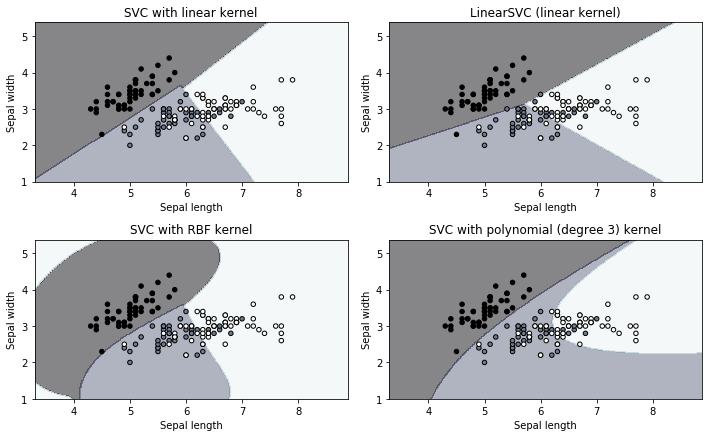

In [3]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(10,10/1.6180))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.bone, alpha=0.5)
    
    ax.scatter(X0, X1, c=y, cmap=plt.cm.bone, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

In [1]:
35/9

3.888888888888889

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


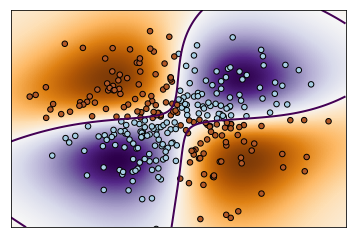

In [4]:
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

https://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html#sphx-glr-auto-examples-svm-plot-weighted-samples-py

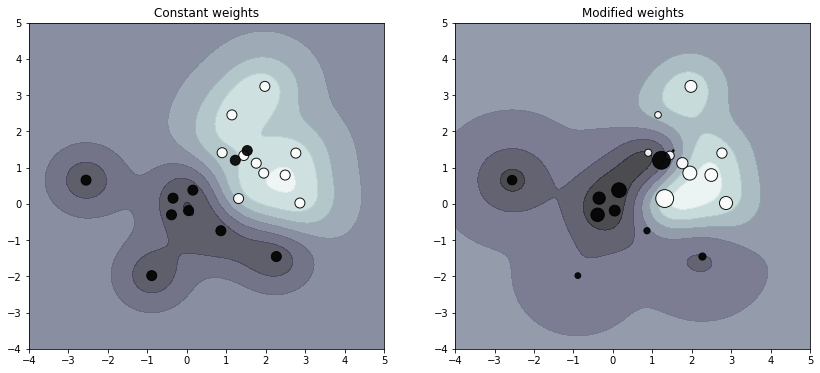

In [5]:
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    #print(np.c_[xx.ravel(), yy.ravel()], xx.ravel(), yy.ravel())
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    #axis.axis('off')
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]

y = [1] * 10 + [-1] * 10



sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# for reference, first fit without sample weights

# fit the model
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Modified weights")

plt.show()


https://github.com/bicv/SparseEdges/blob/master/SparseEdges/EdgeFactory.py#L73

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='rbf', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    print('Confusion matrix, without normalization')   
    print(cm)
    
    print("Normalized confusion matrix")
    norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(norm_cm)

    plt.imshow(norm_cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    thresh = norm_cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '%.2f (%s)'%(norm_cm[i, j], cm[i, j]),
                 horizontalalignment="center",
                 color="white" if norm_cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')

plt.show()
